In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse

In [9]:
def extract_features(filename, model):
    try:
        image = Image.open(filename)
    except:
        print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
    image = image.resize((299,299))
    image = np.array(image)
    # for images that has 4 channels, we convert them into 3 channels
    if image.shape[2] == 4: 
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
         if index == integer:
            return word
    return None
    
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text


In [3]:
from pickle import dump, load
from keras.models import Model, load_model
import tensorflow as tf

max_length = 32
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_9.h5')
xception_model = tf.keras.applications.Xception(include_top=False, pooling="avg")




The caption is :-  two girls are sitting on the grass 


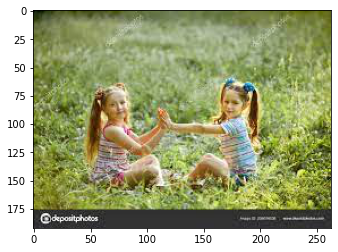

In [10]:
from keras.preprocessing.sequence import pad_sequences

photo = extract_features("test_images_caption/p1.jpg", xception_model)
img = Image.open("test_images_caption/p1.jpg")
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
description=description.replace('start', '')
description=description.replace('end', '')
plt.imshow(img)
print("The caption is :-" ,description)




The caption is :-  man is kayaking in the water 


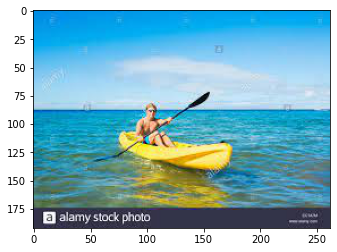

In [11]:
photo = extract_features("test_images_caption/p2.jpg", xception_model)
img = Image.open("test_images_caption/p2.jpg")
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
description=description.replace('start', '')
description=description.replace('end', '')
plt.imshow(img)
print("The caption is :-" ,description)




The caption is :-  two boys playing soccer on field 


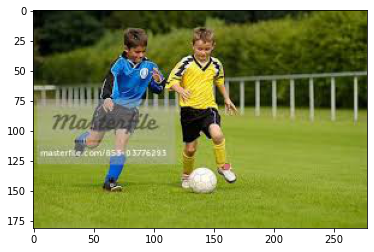

In [12]:
photo = extract_features("test_images_caption/p3.jpg", xception_model)
img = Image.open("test_images_caption/p3.jpg")
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
description=description.replace('start', '')
description=description.replace('end', '')
plt.imshow(img)
print("The caption is :-" ,description)




The caption is :-  two girls are playing in the water 


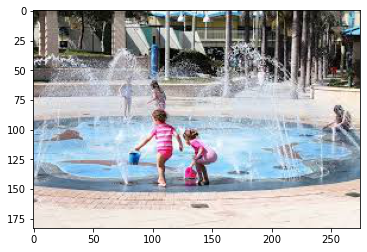

In [13]:
photo = extract_features("test_images_caption/p4.jpg", xception_model)
img = Image.open("test_images_caption/p4.jpg")
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
description=description.replace('start', '')
description=description.replace('end', '')
plt.imshow(img)
print("The caption is :-" ,description)




The caption is :-  dog running through field 


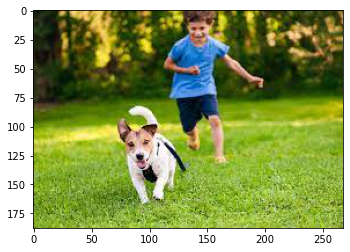

In [14]:
photo = extract_features("test_images_caption/p5.jpg", xception_model)
img = Image.open("test_images_caption/p5.jpg")
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
description=description.replace('start', '')
description=description.replace('end', '')
plt.imshow(img)
print("The caption is :-" ,description)




The caption is :-  man is standing on top of mountain 


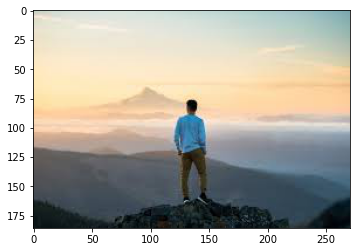

In [31]:
photo = extract_features("test_images_caption/p6.jpg", xception_model)
img = Image.open("test_images_caption/p6.jpg")
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
description=description.replace('start', '')
description=description.replace('end', '')
plt.imshow(img)
print("The caption is :-" ,description)